Iremos treinar um modelo de **Rede Neural** para uma classificação de imagens de roupas, tênis e camisetas. Onde dada uma imagem, a saida esperada é classificação do objeto contido na imagem.

Iremos usar o TensorFlow e Keras para treinar nosso modelo.

Mais detalhes explicados enquanto progredimos.

# **Importando bibliotecas:**


In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print('Bibliotecas importadas com sucesso!\n')

print('TensorFlow', tf.__version__)
print('Keras', keras.__version__)
print('Numpy', np.__version__)

Bibliotecas importadas com sucesso!

TensorFlow 2.3.0
Keras 2.4.0
numpy 1.18.5


Existe uma base de dado pública, na qual já disponibiliza várias imagens de roupas, tênis e camisetas. Iremos importar essa base de dados para usar no nosso treinamento.

Essa base é disponibilizada pelo próprio **Keras**. Se acessarmos o *Keras.datasets*, iremos encontrar inúmeros datasets disponíveis para treinamento.

In [ ]:
FASHION_DATA_SET = keras.datasets.fashion_mnist

#Carregando os dados do dataset
(train_images, train_labels), (test_images, test_labels) = FASHION_DATA_SET.load_data()

Agora vamos definir nossas classes, no qual serão usadas para classificação posteriormente.

In [ ]:
#Aqui estão nossas classificações
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Mostrando valores de treino e teste
print('Conjunto de imagens para treino (Quantidade, Pixels, Pixels): ', train_images.shape)
print('Quantidade de labels para treino: ', len(train_labels))

print('Conjunto de imagens para teste (Quantidade, Pixels, Pixels): ', test_images.shape)
print('Quantidade de labels para teste: ', len(test_labels))

Conjunto de imagens para treino (Quantidade, Pixels, Pixels):  (60000, 28, 28)
Quantidade de labels para treino:  60000
Conjunto de imagens para teste (Quantidade, Pixels, Pixels):  (10000, 28, 28)
Quantidade de labels para teste:  10000


Explorando os dados mostra que existem 60000 imagens no conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels. Essa imagem vai ser representada por uma array 28x28, onde cada pixel representa uma posição do array.

Os labels, são números inteiros entre 0 e 9, que representa a posição no array *class_names*.

# **Pré-processamento dos dados**

Os dados precisam ser pré-processados antes de treinar a rede, retirar ruídos e prerarar corretamente as entradas. \\
Inspecionando a primeira imagem do conjunto de treinamento, vemos que os valores dos pixels estão entre 0 e 255:

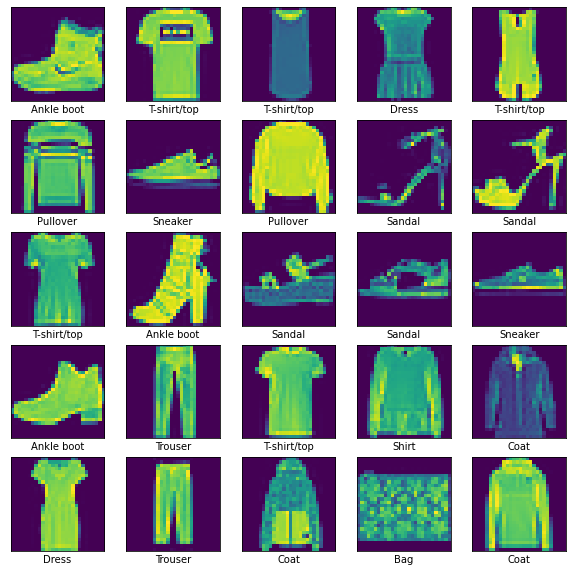

In [49]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Normalizando os intervalos das imagens de 0-255 para 0-1, antes de alimentar o modelo da **Rede Neural**. 

É importante que o conjunto de treinamento e o conjunto de teste sejam pré-processados do mesmo modo.

In [28]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Após normalizado nosso Dataset, transformamos todas as imagens em uma escala preta e branca, para facilitar na hora da classificação, veja como ficou:

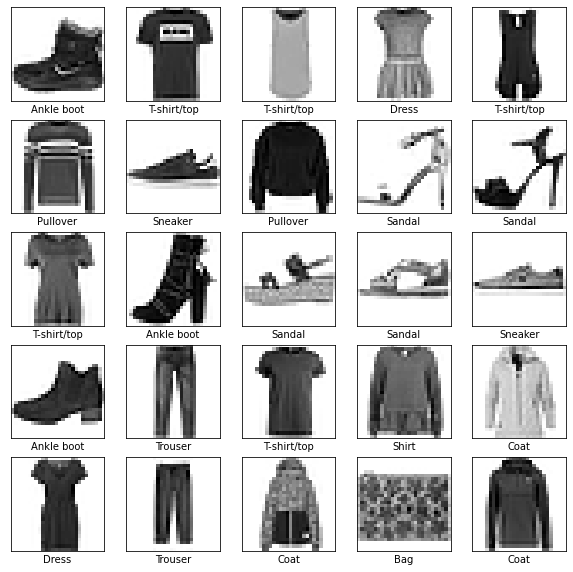

In [48]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Construindo o modelo**

Construir uma **Rede Neural** requer configurar as camadas do modelo, preparar o ambiente de treinamento e teste, datasets, e depois compilar o modelo.

**Montar as camadas**
O principal bloco de construção da rede neural é a camada, como já explicado no slide, iremos montar nossas camadas de processamento, entrada, oculta e saida.

O **Keras** facilita essa etapa para gente, podemos apenas passar como paramêtros o número de camadas que desejamos por exemplo.

Nossa **primeira camada**, irá converter nossas imagens de 2d para 1d, onde os arrays 28x28, passaram a ser um array de 784 posições, cada uma referente a um pixel.

Logo na sequência duas camadas do tipo *tf.keras.layers.Dense*, são camadas neurais densamente/totalmente conectadas, onde ocorrerá nosso processamento.

A **segunda camada**, do tipo *Dense*, tem 100 neuronios.
A **terceira camada**, do tipo *Softmax*, tem 10 nerônios e irá retornar um array de 10 possibilidades, cujo o somatório resultará em 1. Cada posição desse array, inidica a probabilidade de ser da classe especifica daquela posição, definido no inicio pel *class_names*.

In [53]:
model = keras.Sequential([ #Começando com duas camadas
    keras.layers.Flatten(input_shape=(28, 28)), #Transforma as imagens 2d para 1d, ou seja, as imagens passam de um 28x28 para um array de 784 pixels
    keras.layers.Dense(100, activation='relu'), #100 neurônios no início do teste
    keras.layers.Dense(10, activation='softmax')
])

#Cada nó contem um valor que indica a probabilidade de que aquela imagem 
#pertencer a uma das 10 classes

# **Compilando o modelo**
Após o modelo criado, vamos compilar o modelo com algumas métricas para o treinamento e depois testa-lo. 

Estamos passando na compilação os seguintes parametros:

* Função Loss — Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para direção certa.
* Optimizer — Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.
* Métricas — usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a acurácia, a fração das imagens que foram classificadas corretamente.



In [55]:
model.compile(loss='sparse_categorical_crossentropy', #Calcula a perda cruzada categórica esparsa
              optimizer='adam',
              metrics=['accuracy']) 

#A otimização de Adam é um método de descida gradiente estocástico que se 
#baseia na estimativa adaptativa de momentos de primeira e segunda ordem

# **Treinamento do modelo**

Iremos alimentar nosso modelo com os dados de treinamento, importado do Dataset do Keras e previamente tratados. No nosso caso, é o array de imagens e labels: *train_images* e *train_labels*.

O modelo irá aprender como associar essas labels as imagens, e traçar caracteristicas importantes para a classificação.

Podemos alterar o parametro *epochs* para aumentar o número de rodadas de treinamento. O ideal é ir testando com quantas epócas o modelo fica com uma accurácia satisfatória.

À medida que o modelo vai treinando, as métricas *loss* e *accuracy* são mostradas.

In [61]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7408 - accuracy: 0.7398
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7386 - accuracy: 0.7397
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7354 - accuracy: 0.7411
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7325 - accuracy: 0.7424
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7301 - accuracy: 0.7420
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7277 - accuracy: 0.7430
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7253 - accuracy: 0.7430
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7233 - accuracy: 0.7434
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7210 - accuracy: 0.7439
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

Ao colocar mais uma camada no modelo, percebe-se que a acurácia diminiu, verificando assim que para esse modelo de dados e de classificação, a melhor opção é utilizar somente duas camadas.

Verificou-se também que ao trocar a quantidade de neurônios de 128 para 100, houve uma pequena melhora da acurácia nas primeiras iterações do treinamento, mas que ficou abaixo do valor mais alto na última iteração.

Adicionando mais épocas ao treinamento, podemos ver um ganho considerável na acurária. Inicialmente com 10 épocas, um valor aleatório, e depois vamos testando outros valores e comparando os resultados. Fomos testando e obtivemos a acurrácia de 77.26% com 100 épocas. E já temos um tempo considerável de treinamento

Com 50 épocas obtivemos 74%.
Com 100 épocas obtivemos 77,26%.

E percebemos que as últimas 4 épocas, obtiveram resultado semelhantes.

# **Avaliando nosso modelo**

Agora que já possuimos nosso modelo compilado e treinado, vamos testar ele e validar sua eficácia. Iremos usar o conjunto de teste, importado no Dataset do Keras. E a partir desse teste, iremos chegar na acurária do nosso modelo.

In [65]:
test_loss, test_acuracy = model.evaluate(test_images,  test_labels, verbose=2)

print('\nAcurácia do Modelo:', test_acuracy, '%')

313/313 - 0s - loss: 0.6420 - accuracy: 0.7668

Acurácia: 0.7667999863624573 %


Acabou que o a acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um overfitting. Overfitting é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.

*   Acurácia do treinamento: 77.26%
*   Acurácia do teste: 76.67%



# **Utilizando o modelo para predições**

Com o nosso modelo pronto para uso, iremos fazer algumas predições usando as imagens do Dataset.

In [73]:
predictions = model.predict(test_images)

for i in range(12):
    print('Resultado obtido: ', class_names[np.argmax(predictions[i])])
    print('Resultado esperado: ', class_names[test_labels[i]])
    print('\n')

Resultado obtido:  Ankle boot
Resultado esperado:  Ankle boot


Resultado obtido:  Pullover
Resultado esperado:  Pullover


Resultado obtido:  Trouser
Resultado esperado:  Trouser


Resultado obtido:  Trouser
Resultado esperado:  Trouser


Resultado obtido:  Shirt
Resultado esperado:  Shirt


Resultado obtido:  Trouser
Resultado esperado:  Trouser


Resultado obtido:  Pullover
Resultado esperado:  Coat


Resultado obtido:  Shirt
Resultado esperado:  Shirt


Resultado obtido:  Sandal
Resultado esperado:  Sandal


Resultado obtido:  Sneaker
Resultado esperado:  Sneaker


Resultado obtido:  Pullover
Resultado esperado:  Coat


Resultado obtido:  Sandal
Resultado esperado:  Sandal




A predição é um array de 10 números. Eles representam um a confiança do modelo que a imagem corresponde a cada um das diferentes categorias de roupa. Podemos ver cada label tem um maior valor de confiança e que existem algumas predições erradas, devida a nossa acurácia do modelo.

Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

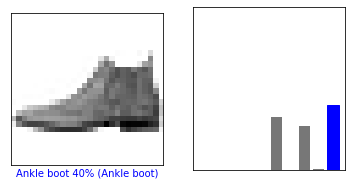

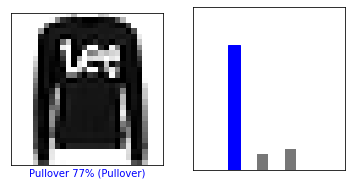

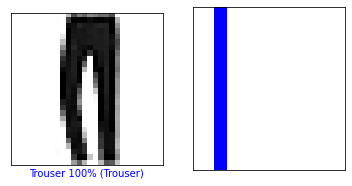

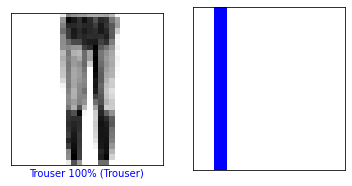

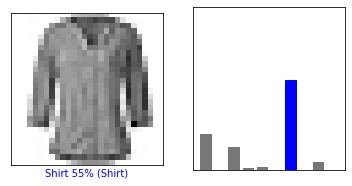

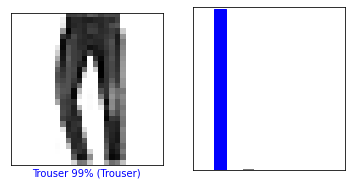

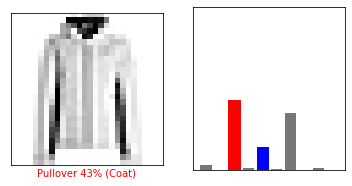

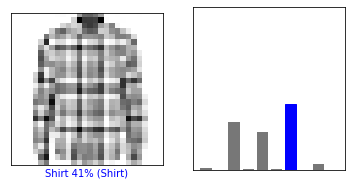

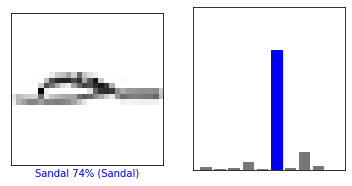

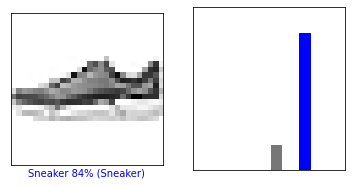

In [78]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions,  test_labels)
  plt.show()

Imagens classifcadas corretamente são azuis e as predições erradas são vermelhas.

Vamos plotar algumas da previsão do modelo. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estão confiante.

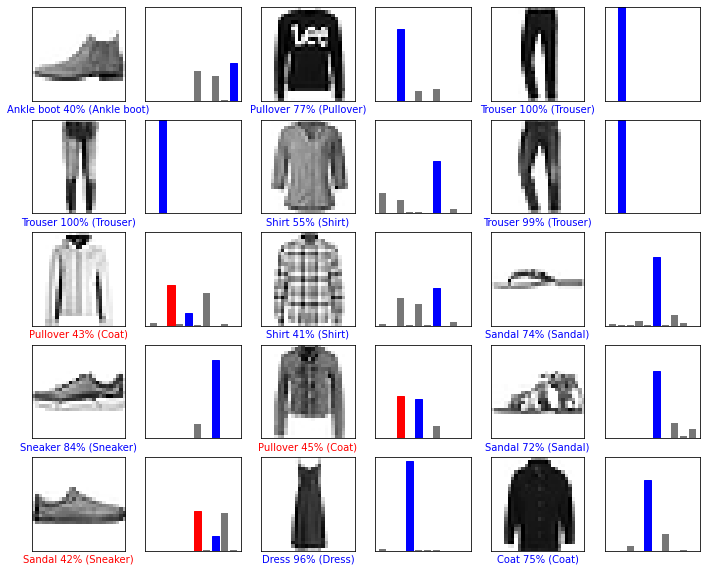

In [79]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

A partir de agora, já podemos usar nosso modelo para testar uma única imagem. Podemos criar uma API e permitir que o Front-end forneca uma imagem, nosso modelo prediz ela e retorna o resultado.

Um exemplo de onde esse modelo de classificação de imagens poderia ser usada, seria em imagens Raio-x em areoportos para detectar armas em mochilas e malas. Seriam trocados apenas as imagens do dataset e as classes, o processamento das imagens deveria ser ajustado conforme a necessidade também.

Vamos testar uma única imagem agora:

Resultado obtido:  Ankle boot




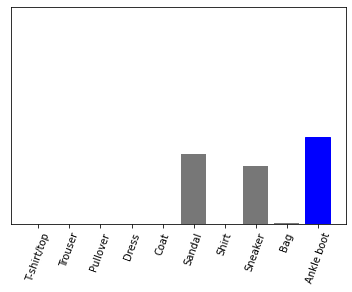

In [91]:
# Grab an image from the test dataset.
img = test_images[0]
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)

print('Resultado obtido: ', class_names[np.argmax(predictions_single[0])])
print('\n')

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=70)

E esse é basicamente o processo de criação de uma **Rede Neural**, preparar os dados, criar o modelo, compilar, testar e reajustar o modelo, até chegarmos em uma acurácia satisfatória.

Conclusões, temos que ir testando e compilando várias vezes com parametros diferentes, para ver para se a acurácia está subindo ou descendo. O processamento das imagens antes do treinar é muito importante, porque devemos limpar elas e focar apenas no detalhes, se deixarmos ruídos, eles poderam ser usados como caracteristicas, e irá apontar falso positivos.

Uma solução alternativa para esse problema, seria utilizar o IBM Watson, onde ele já possui uma API pronta para classificação de imagens. Apenas criamos as classes, adicionamos imagens modelos, que represente nosso objeto, e treinamos o modelo. Também é permitido adicionar imagens negativas, que são consideradas imagens muito parecidas, mas que não são o que o realmente queremos.